# Sentiment Classifier: Training the ML Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import nltk
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc
#from termcolor import colored
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize

In [2]:
lemma = WordNetLemmatizer()
STOPWORDS=set(stopwords.words('english')+list(punctuation))
STOPWORDS.remove("not")

# 1 LOADING LABELLED DATA

In [3]:
sentimentData=pd.read_csv('labelledTweets.csv')

In [4]:
sentimentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5948 entries, 0 to 5947
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TweetsID         5948 non-null   object
 1   Cleaned_Tweets   5948 non-null   object
 2   CleanText        5948 non-null   object
 3   Positive         5948 non-null   int64 
 4   Negative         5948 non-null   int64 
 5   Sentiment_score  5948 non-null   object
dtypes: int64(2), object(4)
memory usage: 278.9+ KB


In [5]:
sentimentData.head(2)

,TweetsID,Cleaned_Tweets,CleanText,Positive,Negative,Sentiment_score
0,62c025362199f17ae64a6e30,the insurance industry has an opportunity to d...,insurance industry opportunity develop affirma...,1,-2,Negative
1,62c02a9e2199f17ae64a6e3b,user_mention user_mention user_mention user_me...,wellknown socialist come man silly explain ple...,2,-3,Negative


In [6]:
processing_Data=sentimentData.copy()

In [7]:
processing_Data.drop(['TweetsID','Cleaned_Tweets','Positive','Negative'], axis = 1, inplace = True)

In [8]:
processing_Data.head(2)

,CleanText,Sentiment_score
0,insurance industry opportunity develop affirma...,Negative
1,wellknown socialist come man silly explain ple...,Negative


##   2 Performing labelling encoding

In [9]:
processing_Data.loc[processing_Data['Sentiment_score']=='Positive','Sentiment_score']=1

In [10]:
processing_Data.loc[processing_Data['Sentiment_score']=='Neutral','Sentiment_score']=0

In [11]:
processing_Data.loc[processing_Data['Sentiment_score']=='Negative','Sentiment_score']=-1

In [12]:
processing_Data.tail()

,CleanText,Sentiment_score
5943,children victims putins war,-1
5944,another result 1939 usa stay war european aggr...,-1
5945,since not declared war legally laws limited us...,-1
5946,warned west interference invasion pose threat ...,-1
5947,russians cashed 13 billion banks first day rus...,0


In [13]:
processing_Data['CleanText'][5947]

'russians cashed 13 billion banks first day russias invasion largest amount since onset covid19 ch lto eth'

In [35]:
# Comparing the output of the encoding to confirm it talllies with Cell 26(Distinct tweets)
print("Total distinct labelled tweets in the dataset: {}".format(processing_Data.shape[0]))
Tweet_count = processing_Data['Sentiment_score'].value_counts()
Tweet_count

Total distinct labelled tweets in the dataset: 4406


-1    3740
 1     666
Name: Sentiment_score, dtype: int64

##    3 Removing Neutral Tweets

In [43]:
processing_Data=processing_Data[processing_Data['Sentiment_score']!=0]

In [16]:
print()
train_dataset = pd.DataFrame({'CleanText': X_train,'Category': y_train})
print(colored("Percentage of training dataset is : %.1f%%" % (len(train_dataset)/len(processing_Data)*100),"green"))
print(train_dataset['Category'].value_counts())
print()

test_dataset = pd.DataFrame({'CleanText': x_test,'Category': y_test})
print(colored("Percentage of testing dataset is: %.1f%%" % (len(test_dataset)/len(processing_Data)*100),"green"))
print(test_dataset['Category'].value_counts())


train_tweet_label =train_dataset['Category'].astype('int')
test_tweet_label = test_dataset['Category'].astype('int')


NameError: name 'X_train' is not defined

##  4 Splitting to Train and Test Data

In [37]:
dF_features=processing_Data['CleanText']
dF_target=processing_Data['Sentiment_score']

In [38]:
X_train, x_test, y_train, y_test = train_test_split(dF_features, dF_target, test_size=0.2, random_state=11)

In [39]:
y_train=y_train.astype('int')
expected=y_test=y_test.astype('int')

In [50]:
print()
train_dataset = pd.DataFrame({'CleanText': X_train,'Category': y_train})
print(colored("Percentage of training dataset is : %.1f%%" % (len(train_dataset)/len(processing_Data)*100),"green"))
print(train_dataset['Category'].value_counts())
print()

test_dataset = pd.DataFrame({'CleanText': x_test,'Category': y_test})
print(colored("Percentage of testing dataset is: %.1f%%" % (len(test_dataset)/len(processing_Data)*100),"green"))
print(test_dataset['Category'].value_counts())


train_tweet_label =train_dataset['Category'].astype('int')
test_tweet_label = test_dataset['Category'].astype('int')


Percentage of training dataset is : 80.0%
-1    3000
 1     524
Name: Category, dtype: int64

Percentage of testing dataset is: 20.0%
-1    740
 1    142
Name: Category, dtype: int64


##   5 Performing Features Extraction

In [44]:
features_Extractor=TfidfVectorizer(analyzer=lemmatize_func,min_df=1,stop_words=STOPWORDS)

In [45]:
train_tweet_vector =features_Extractor.fit_transform(train_dataset['CleanText'])
test_tweet_vector = features_Extractor.transform(test_dataset['CleanText'])

# Training the model

In [46]:
val_tweet_vector=features_Extractor.fit_transform(processing_Data['CleanText'])

In [47]:
val_test_tweet_label=processing_Data['Sentiment_score'].map(int)

# Testing the models

In [52]:
MNB_estimator = classifier(MultinomialNB(),train_tweet_vector,train_tweet_label,test_tweet_vector) #MNB_estimator

##  6 Model Evaluation:

#### 1. Accuracy score

In [53]:
accuracy()

       MultinomialNB: accuracy score=84.24%; 


### 2. Classification_Reports

In [54]:
classification_Reports()

       MultinomialNB: classification_report
              precision    recall  f1-score   support

          -1       0.84      1.00      0.91       740
           1       1.00      0.02      0.04       142

    accuracy                           0.84       882
   macro avg       0.92      0.51      0.48       882
weighted avg       0.87      0.84      0.77       882



###    3. Cross Validation using 10 folds

In [57]:
validation_Report()

       MultinomialNB: mean accuracy=85.20%; standard deviation=1.90%


###  4. Confusion Matrix

       MultinomialNB: Confusion Matrix score
[[740   0]
 [139   3]]

Predicted   -1  1  All
Expected              
-1         740  0  740
1          139  3  142
All        879  3  882




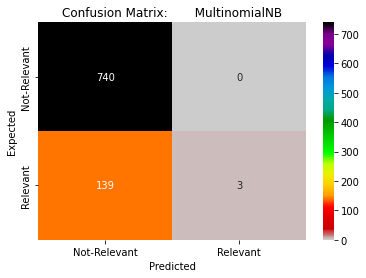

<Figure size 576x576 with 0 Axes>

In [58]:
confusion_Matrix()

###  5. AUC ROC

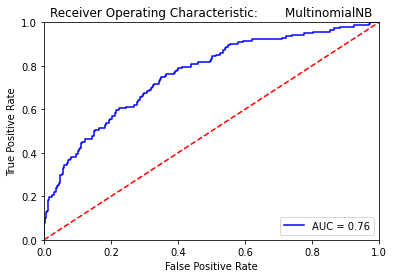

In [59]:
plot_roc_curve()

# Corresponding functions used in above analysis

In [17]:
#1. 1.User defined functuions to tokennize tweets

In [18]:
def lemmatize_func(tweets):
    tweets_Text=tweets.lower()
    words = word_tokenize(tweets_Text)
    valid_Words=[]
    for word in words :
        if word in STOPWORDS:continue
        valid_Words.append(word)
    return [lemma.lemmatize(word) for word in valid_Words]

In [19]:
#2.User defined Dynamic Estimators/Classifiers

In [20]:
def classifier(estimator,training_features,training_labels,test_features):
    estimator_object = estimator
    estimator_object.fit(training_features, training_labels)
    predicted= estimator_object.predict(test_features)
    return predicted

In [21]:
# 3.User defined enumerator to group classifier

In [22]:
estimators = {
'MultinomialNB': MultinomialNB()
#'DecisionTree': DecisionTreeClassifier()
}

In [23]:
#4.User defined function to compute 10-fold cross-validation

In [56]:
def validation_Report():
    for estimator_name, estimator_object in estimators.items():
        kfold = KFold(n_splits=10, random_state=7, shuffle=True)
        scores = cross_val_score(estimator=estimator_object,
        X=val_tweet_vector, y=val_test_tweet_label, cv=kfold)
        print(colored(f'{estimator_name:>20}: ' +
        f'mean accuracy={scores.mean():.2%}; ' +
        f'standard deviation={scores.std():.2%}',"green"))

In [25]:
#5. Function to compute Accuracy

In [26]:
def accuracy():
    for estimator_name, estimator_object in estimators.items():
        model=estimator_object
        model.fit(train_tweet_vector,train_tweet_label)
        scores =model.score(test_tweet_vector, test_tweet_label)
        print(f'{estimator_name:>20}: ' +f'accuracy score={scores:.2%}; ')

In [27]:
#6. Function to plot Confusion Matrix

In [28]:

def confusion_Matrix():
    for estimator_name, estimator_object in estimators.items():
        model=estimator_object
        pred=classifier(model,train_tweet_vector,train_tweet_label,test_tweet_vector)
        confusion = confusion_matrix(test_tweet_label,pred )
        print(colored(f'{estimator_name:>20}: ' +f'Confusion Matrix score',"green"));
        print(confusion)
        confusion_df = pd.DataFrame(confusion, index=range(2),columns=range(2))
        print()
        z=pd.crosstab(test_tweet_label,pred,rownames=['Expected'], colnames=['Predicted'],margins=True)
        print(z)
        print()
        ax= plt.subplot()
        sns.heatmap(confusion_df, annot=True,ax=ax,cmap='nipy_spectral_r',fmt ='d')
        print()
        plt.figure(figsize=(8, 8))
        # labels, title and ticks
        ax.set_xlabel('Predicted');ax.set_ylabel('Expected');
        ax.set_title('Confusion Matrix:'f'{estimator_name:>20}');
        ax.xaxis.set_ticklabels(['Not-Relevant', 'Relevant']); ax.yaxis.set_ticklabels(['Not-Relevant', 'Relevant']);

In [29]:
#7. Function to plot AUC ROC

In [30]:
def plot_roc_curve():
    for estimator_name, estimator_object in estimators.items():
        model=estimator_object
        model.fit(train_tweet_vector,train_tweet_label)
        preds = model.predict_proba(test_tweet_vector)[:,1]
        fpr, tpr, threshold = roc_curve(expected, preds)
        roc_auc = auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic:'f'{estimator_name:>20}')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [31]:
#8. Function to compute classification report

In [32]:
def classification_Reports():
    for estimator_name, estimator_object in estimators.items():
        model=estimator_object
        class_reports = (classification_report(test_tweet_label, classifier(model,train_tweet_vector,train_tweet_label,test_tweet_vector)))
        scores =model.score(test_tweet_vector, test_tweet_label)
        print(colored(f'{estimator_name:>20}: ' +f'classification_report',"green"))
        print(class_reports)